<a href="https://colab.research.google.com/github/mikosa01/TEAMNOLT/blob/main/group_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np 
from pathlib import Path
import sys 
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot  as plt 
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import os
#from sklearn.metrics import confusion_matrix, classification_report
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':'1c06v0ViaOvssxGV14zbggB72NcvFR6AE'})
downloaded.GetContentFile('Group_Project_Data.zip')

In [52]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [53]:
zip_files = ['Train', 'Valid']
for zip_file in zip_files:
  with zipfile.ZipFile('Group_Project_Data.zip'.format(zip_file), 'r') as z: 
    z.extractall('.')
    print('{} unzipped'.format(zip_file))

Train unzipped
Valid unzipped


In [54]:
train_dir =  '/content/Group_Project_Data/Train'
val_dir =  '/content/Group_Project_Data/Valid'

In [55]:
train_datagen = ImageDataGenerator(rescale=1./255)  # rescale pixel values to [0, 1]
val_datagen = ImageDataGenerator(rescale=1./255)

In [56]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  
    batch_size=32,
    color_mode='grayscale',
    class_mode='binary'  
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=32,
    color_mode='grayscale',
    class_mode='binary'
)

Found 6000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [66]:
from keras import regularizers


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding = 'valid', kernel_initializer='he_normal',  input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding = 'same',kernel_regularizer=regularizers.l2(l=0.01)), 
    tf.keras.layers.MaxPooling2D((2, 2), ),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding = 'same',kernel_regularizer=regularizers.l2(l=0.01)), 
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding = 'same', kernel_regularizer=regularizers.l2(l=0.01)), 
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding = 'same', kernel_regularizer=regularizers.l2(l=0.01)), 
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [67]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [68]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)

In [69]:
history= model.fit(train_generator, epochs=10, validation_data=val_generator, verbose = 2, callbacks = [early_stopping])

Epoch 1/10
188/188 - 7s - loss: 0.7913 - accuracy: 0.7128 - val_loss: 0.1461 - val_accuracy: 0.9955 - 7s/epoch - 36ms/step
Epoch 2/10
188/188 - 5s - loss: 0.1468 - accuracy: 0.9900 - val_loss: 0.0983 - val_accuracy: 0.9970 - 5s/epoch - 26ms/step
Epoch 3/10
188/188 - 4s - loss: 0.1006 - accuracy: 0.9950 - val_loss: 0.1211 - val_accuracy: 0.9820 - 4s/epoch - 21ms/step
Epoch 4/10
188/188 - 4s - loss: 0.0968 - accuracy: 0.9905 - val_loss: 0.0967 - val_accuracy: 0.9945 - 4s/epoch - 21ms/step
Epoch 5/10
188/188 - 5s - loss: 0.0770 - accuracy: 0.9965 - val_loss: 0.0593 - val_accuracy: 0.9980 - 5s/epoch - 26ms/step
Epoch 6/10
188/188 - 4s - loss: 0.0645 - accuracy: 0.9963 - val_loss: 0.0510 - val_accuracy: 0.9990 - 4s/epoch - 21ms/step
Epoch 7/10
188/188 - 4s - loss: 0.0607 - accuracy: 0.9960 - val_loss: 0.1515 - val_accuracy: 0.9710 - 4s/epoch - 21ms/step
Epoch 8/10
188/188 - 5s - loss: 0.0550 - accuracy: 0.9973 - val_loss: 0.0485 - val_accuracy: 0.9965 - 5s/epoch - 26ms/step
Epoch 9/10
188/1

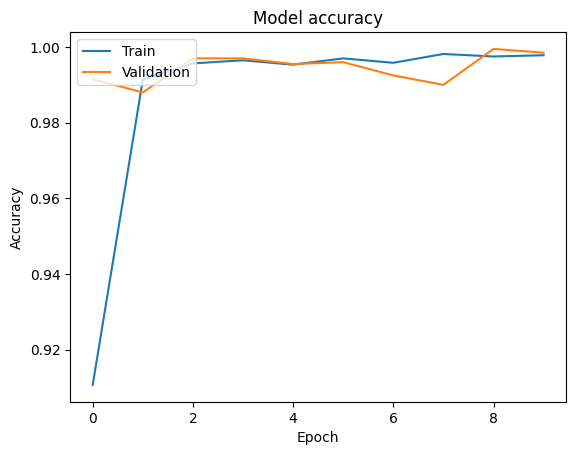

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

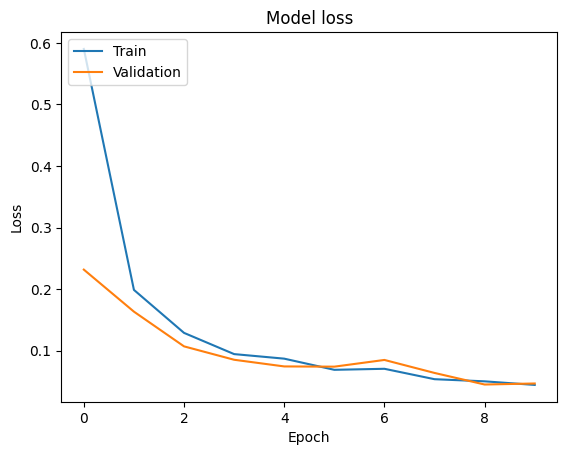

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [70]:
# Saving your model

model.save('/content/Team_NOLT_Model_Trained')

In [71]:
# Test saved model

loaded_model = tf.keras.models.load_model('/content/Team_NOLT_Model_Trained')
loaded_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 31, 31, 32)        9248      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 15, 15, 32)        9248      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 7, 7, 32)        

In [72]:
# zip the model
!zip -r /content/Team_NOLT_Model_Trained.zip /content/Team_NOLT_Model_Trained

  adding: content/Team_NOLT_Model_Trained/ (stored 0%)
  adding: content/Team_NOLT_Model_Trained/assets/ (stored 0%)
  adding: content/Team_NOLT_Model_Trained/saved_model.pb (deflated 90%)
  adding: content/Team_NOLT_Model_Trained/variables/ (stored 0%)
  adding: content/Team_NOLT_Model_Trained/variables/variables.data-00000-of-00001 (deflated 14%)
  adding: content/Team_NOLT_Model_Trained/variables/variables.index (deflated 68%)
  adding: content/Team_NOLT_Model_Trained/keras_metadata.pb (deflated 93%)
  adding: content/Team_NOLT_Model_Trained/fingerprint.pb (stored 0%)
